Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

**total multiplication = n*m*k**
    one row makes k multiplications with one column, and there are m columns therefore one row makes m*k multiplications so finally total multiplications are m*k*n


**total addition = n*(k-1)*m**
    one row makes k-1 addition with one column, and there are m columns therefore one rox=w makes m*(k-1) additions so finally total multiplications are m*(k-1)*n


**Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

Numpy is faster than list of lists. list uses more storage where as numpy have efficent memory and this makes numpy faster

In [ ]:
import time
import numpy as np
a=[[1,1],[1,1],[1,1]]
b=[[2,2,2],[2,2,2]]
n=len(a)
m=len(b[0])
print(n,m)

c=0
t1=time.time()
h = [[0 for j in range(m)] for i in range(n)]
for k in range (m):
    for i in range (n):
        for j in range (len(a[0])):
            c+=(a[i][j]*b[j][k])
        h[i][k]=c
        c=0

t2=time.time()
print(h)
print(t2-t1)

t3= time.time()
h1=np.dot(a,b)
t4= time.time()
print(h1)
print(t4-t3)

3 3
[[4, 4, 4], [4, 4, 4], [4, 4, 4]]
0.00028896331787109375
[[4 4 4]
 [4 4 4]
 [4 4 4]]
0.00011706352233886719


**Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

Time complexity = O(n**2) of first method

Better method can be first sorting the array and the finding median with the defination of median

In [ ]:
import numpy as np
import time
a=[ 8,7,6,5,4,3,2,1]
t1=time.time()
k=a.copy()
for j in range(len(a)//2):
  m=0
  for i in range(len(k)):
    if m<k[i]:
      m=k[i]
  k.remove(m)
if(len(a)%2==0):
  c=0
  for i in range(len(k)):
    if c<k[i]:
      c=k[i]
  print((m+c)/2)
else:
  c=0
  for i in range(len(k)):
    if c<k[i]:
      c=k[i]
  print(c)
t2=time.time()
print(t2-t1)
t3=time.time()
l=np.median(a)
t4=time.time()
print (l)
print(t4-t3)

4.5
0.0013849735260009766
4.5
0.0003681182861328125


In [ ]:
t5=time.time()
h=len(a)
for i in range(h):
  for j in range(h-1):
    if a[j]>a[j+1]:
      a[j],a[j+1]=a[j+1],a[j]
if h%2==0:
  print((a[(h//2)-1]+a[h//2])/2)
else:
  print(a[h//2])
t6=time.time()
print(t6-t5)

4.5
0.0024957656860351562


**Q4. What is the gradient of the following function with respect to x and y? x*x*y + y*y*y*sin(x)**

with respect to x = 2*x*y + y**3*cos(x)

with respect to y = x**2 + 3*y**2*sin(x)

**Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [ ]:
import jax
import jax.numpy as jnp
def f1(x, y):
    return x*x*y + y*y*y*jnp.sin(x)
def fx(x,y):
  return 2*x*y + y*y*y*jnp.cos(x)
def fy(x,y):
  return x*x + 3*y*y*jnp.sin(x)
px=jax.grad(f1, argnums=0)
py=jax.grad(f1, argnums=1)
x=1.0
y=2.0
a1=px(x,y)
a2=py(x,y)
b1=fx(x,y)
b2=fy(x,y)
print(a1)
print(b1)
print(a2)
print(b2)

8.322418
8.322418
11.0976515
11.0976515


**Q6. Use sympy to confirm that you obtain the same gradient analytically.**

In [ ]:
import sympy as sp
x,y = sp.symbols('x y')
def f1(x, y):
    return x*x*y + y*y*y*sp.sin(x)
s1=sp.diff(f1(x,y), x)
s2=sp.diff(f1(x,y), y)
print(s1)
print(s2)

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


**Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.**

In [3]:
nd={'2022':{'Branch 1':{'roll no':1,'Name':'N','Marks':{'Maths':100,'English':70}},'Branch2':2},'2023':{'Branch1':1,'Branch2':2},'2024':{'Branch1':1,'Branch2':2},'2025':{'Branch1':1,'Branch2':2}}
print(nd['2022'])

{'Branch 1': {'roll no': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}, 'Branch2': 2}


**Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [5]:
class Student:
    def __init__(self, name, rn, marks):
        self.name = name
        self.rn = rn
        self.marks=marks


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)


student1=Student(name='N',rn='1',marks={'Maths':100,'English':70})
branch1=Branch(name='Branch1')
branch2=Branch(name='Branch2')
branch1.add_student(student1)
y1=Year(year=2022)
y1.add_branch(branch1)
y1.add_branch(branch2)
db=[y1]


**Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

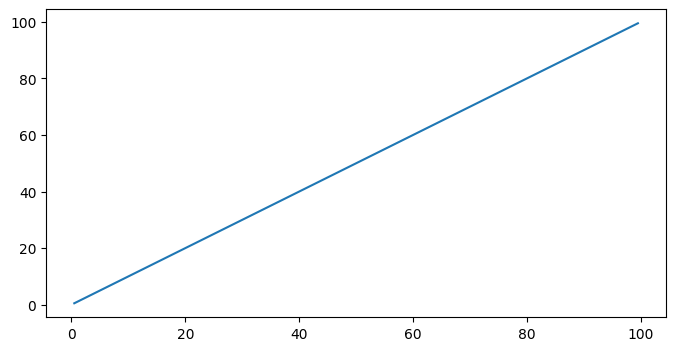

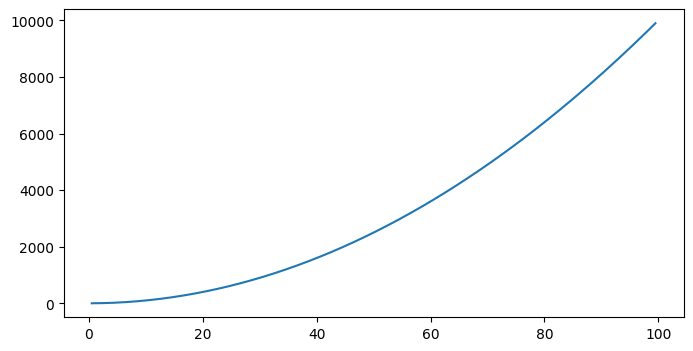

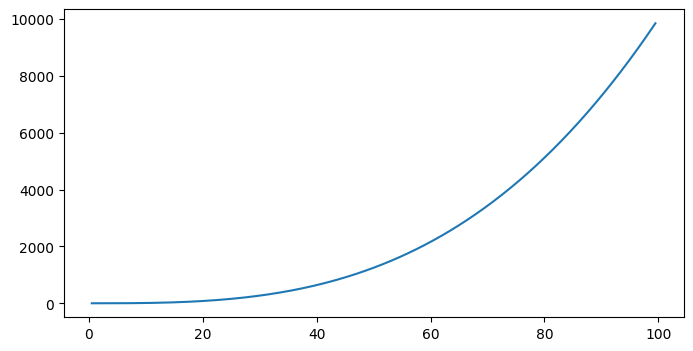

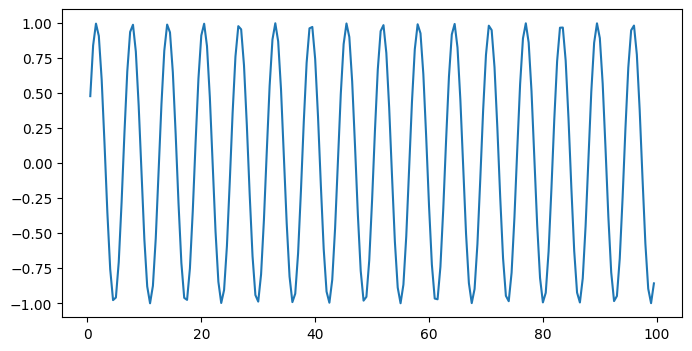

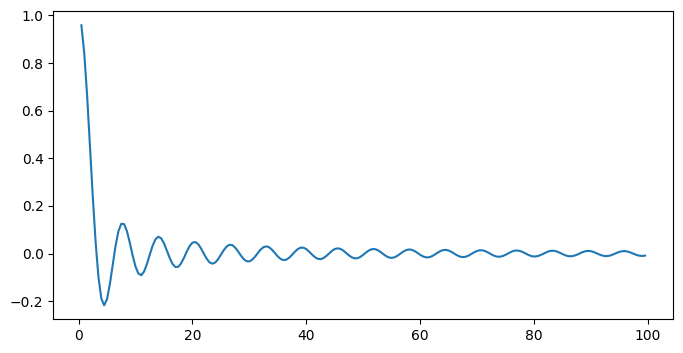

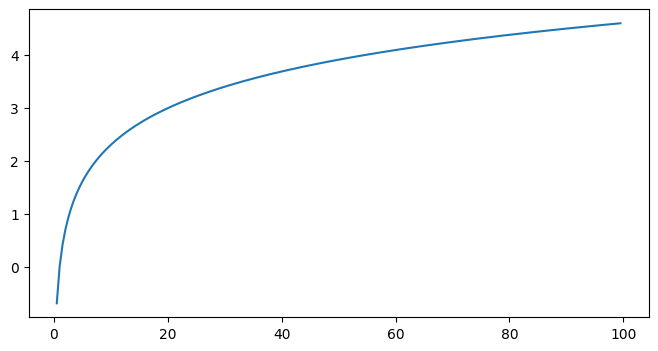

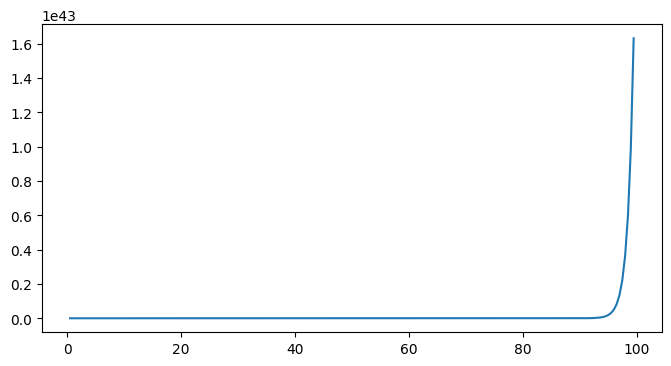

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
def f1(x):
  return x
def f2(x):
  return x*x
def f3(x):
  return x**3/100
def f4(x):
  return np.sin(x)
def f5(x):
  return np.sin(x)/x
def f6(x):
  return np.log(x)
def f7(x):
  return np.exp(x)
x=np.arange(0.5,100.0,0.5)
plt.figure(figsize=(8, 4))
plt.plot(x,f1(x))
plt.show()
plt.figure(figsize=(8, 4))
plt.plot(x,f2(x))
plt.show()
plt.figure(figsize=(8, 4))
plt.plot(x,f3(x))
plt.show()
plt.figure(figsize=(8, 4))
plt.plot(x,f4(x))
plt.show()
plt.figure(figsize=(8, 4))
plt.plot(x,f5(x))
plt.show()
plt.figure(figsize=(8, 4))
plt.plot(x,f6(x))
plt.show()
plt.figure(figsize=(8, 4))
plt.plot(x,f7(x))
plt.show()


**Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**



In [ ]:
import numpy as np
import pandas as pd
a=np.random.uniform(1,2,size=(20,5))
b=pd.DataFrame(a, columns=['a','b','c','d','e'])
h1=np.argmax(b.std())
h2=np.argmin(b.mean(axis=1))
print(b)
print(h1)
print(h2)

           a         b         c         d         e
0   1.470794  1.854254  1.318394  1.674940  1.961383
1   1.247723  1.545878  1.562200  1.526029  1.657966
2   1.956550  1.643206  1.812750  1.316650  1.209134
3   1.500005  1.584581  1.734018  1.499219  1.685837
4   1.665238  1.977183  1.666905  1.529202  1.095433
5   1.451371  1.047121  1.195563  1.740945  1.805057
6   1.512231  1.923675  1.414854  1.684597  1.640602
7   1.388731  1.287528  1.971466  1.845520  1.338948
8   1.547463  1.578182  1.066763  1.294763  1.069281
9   1.055540  1.722076  1.875593  1.710094  1.580289
10  1.565279  1.437460  1.121911  1.523690  1.705804
11  1.497279  1.286231  1.577543  1.028498  1.126349
12  1.950647  1.946607  1.937432  1.059434  1.698313
13  1.569269  1.823504  1.807587  1.782342  1.443259
14  1.519914  1.761829  1.043341  1.839758  1.253840
15  1.290885  1.510787  1.709957  1.772429  1.703366
16  1.625219  1.733723  1.915613  1.164742  1.434053
17  1.869352  1.577469  1.291934  1.769375  1.

**Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [ ]:
b['f']=b['a']+b['b']+b['c']+b['d']+b['e']
print(b)
b['g'] = np.where(b['f'] < 8, 'LT8', 'GT8')
print(b)
n = len(b[b['g'] == 'LT8'])
print(n)
std1= b[b['g'] == 'LT8']['f'].std()
std2 = b[b['g'] == 'GT8']['f'].std()
print(std1)
print(std2)

           a         b         c         d         e         f    g
0   1.470794  1.854254  1.318394  1.674940  1.961383  8.279765  GT8
1   1.247723  1.545878  1.562200  1.526029  1.657966  7.539794  LT8
2   1.956550  1.643206  1.812750  1.316650  1.209134  7.938290  LT8
3   1.500005  1.584581  1.734018  1.499219  1.685837  8.003660  GT8
4   1.665238  1.977183  1.666905  1.529202  1.095433  7.933961  LT8
5   1.451371  1.047121  1.195563  1.740945  1.805057  7.240057  LT8
6   1.512231  1.923675  1.414854  1.684597  1.640602  8.175959  GT8
7   1.388731  1.287528  1.971466  1.845520  1.338948  7.832194  LT8
8   1.547463  1.578182  1.066763  1.294763  1.069281  6.556452  LT8
9   1.055540  1.722076  1.875593  1.710094  1.580289  7.943593  LT8
10  1.565279  1.437460  1.121911  1.523690  1.705804  7.354144  LT8
11  1.497279  1.286231  1.577543  1.028498  1.126349  6.515900  LT8
12  1.950647  1.946607  1.937432  1.059434  1.698313  8.592432  GT8
13  1.569269  1.823504  1.807587  1.782342  1.44

**Q12. Write a small piece of code to explain broadcasting in numpy.**

In [ ]:
import numpy as np
a=5
b=np.array([1,2,3,4,5])
c=a*b
print(c)

[ 5 10 15 20 25]


**Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**

In [ ]:
import numpy as np
def min(n):
  m=1000
  j=100000
  for i in range (len(n)):
    if m>n[i]:
      m=n[i]
      j=i
  return j
n=[2,4,67,1,4,6]
print(min(n))
print(np.argmin(n))

3
3
